# Imports

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk # Natural Languaje Tool Kit


# Data preparation

In [2]:
product_df = pd.read_csv('Greenis.csv', delimiter=',') # read csv file and create a pandas dataframa

In [3]:
product_df.shape # Check for shape 

(632, 5)

There are 5 colums and 632 rows


In [4]:
product_df.head() # Check dataframe head

,Unnamed: 0,Score,Summary,Text,original_text
0,0,5,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...,my 12 year old sheltie has chronic brochotitis...
1,1,5,genuine greenies best price,these are genuine greenies product not a knock...,these are genuine greenies product not a knock...
2,2,5,perfect for our little doggies,our dogs love greenies but of course which dog...,our dogs love greenies but of course which dog...
3,3,5,dogs love greenies,what can i say dogs love greenies they begg fo...,what can i say dogs love greenies they begg fo...
4,4,5,greenies review,this review is for a box of greenies lite for ...,this review is for a box of greenies lite for ...


In [5]:
# product_df =  product_df[['Score','Summary','Text']].copy() # Copy dataframe with a limited number of columns

Removing unnecesary columns 

In [6]:
product_df.columns # Check new dataframe colum names

Index(['Unnamed: 0', 'Score', 'Summary', 'Text', 'original_text'], dtype='object')

# Example

In [7]:
example =  product_df ['Text'][100]
example

'i have been feeding our dogs greenie bones since they first came out and we have never had a problem  i have german shepards dobermans and medium sized hound dogs  they all love their gbs and i find that because our dobie tends to be a garbage belly meaning shell eat anything so sometimes she doesnt smell as nice as she should really benefits from the green in greenie bones  i would like to know where e antic gets hisher information fromas i can find nothing that says they are deadly except for those people that havent done responsible research not just hearsay from some list  if your dogs are gulpers or greedy chewers then i wouldnt feed them anything especially rawhide that could be gulped and swallowed in large pieces or whole  do we need to bring up nylabones  always be a responsible dog owner and supervise your dogs when giving any kind of treats  please dont be afraid of greenie bones because of e antics post  you can buy greenies in singles so try one before you commit to a who

In [8]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()


In [9]:

#nltk.download()  # starts nltk downloader

In [10]:
sia.polarity_scores('This is a perfect evening') # Calcluate polarity scores for a positive sentence

{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719}

In [11]:
sia.polarity_scores('This is awful') # Calcluate polarity scores for a negative sentence 

{'neg': 0.6, 'neu': 0.4, 'pos': 0.0, 'compound': -0.4588}

In [12]:
example

'i have been feeding our dogs greenie bones since they first came out and we have never had a problem  i have german shepards dobermans and medium sized hound dogs  they all love their gbs and i find that because our dobie tends to be a garbage belly meaning shell eat anything so sometimes she doesnt smell as nice as she should really benefits from the green in greenie bones  i would like to know where e antic gets hisher information fromas i can find nothing that says they are deadly except for those people that havent done responsible research not just hearsay from some list  if your dogs are gulpers or greedy chewers then i wouldnt feed them anything especially rawhide that could be gulped and swallowed in large pieces or whole  do we need to bring up nylabones  always be a responsible dog owner and supervise your dogs when giving any kind of treats  please dont be afraid of greenie bones because of e antics post  you can buy greenies in singles so try one before you commit to a who

In [13]:
tokens =  nltk.word_tokenize(example) # Create a list of tokens, (Divide text in words)

In [14]:
tokens

['i',
 'have',
 'been',
 'feeding',
 'our',
 'dogs',
 'greenie',
 'bones',
 'since',
 'they',
 'first',
 'came',
 'out',
 'and',
 'we',
 'have',
 'never',
 'had',
 'a',
 'problem',
 'i',
 'have',
 'german',
 'shepards',
 'dobermans',
 'and',
 'medium',
 'sized',
 'hound',
 'dogs',
 'they',
 'all',
 'love',
 'their',
 'gbs',
 'and',
 'i',
 'find',
 'that',
 'because',
 'our',
 'dobie',
 'tends',
 'to',
 'be',
 'a',
 'garbage',
 'belly',
 'meaning',
 'shell',
 'eat',
 'anything',
 'so',
 'sometimes',
 'she',
 'doesnt',
 'smell',
 'as',
 'nice',
 'as',
 'she',
 'should',
 'really',
 'benefits',
 'from',
 'the',
 'green',
 'in',
 'greenie',
 'bones',
 'i',
 'would',
 'like',
 'to',
 'know',
 'where',
 'e',
 'antic',
 'gets',
 'hisher',
 'information',
 'fromas',
 'i',
 'can',
 'find',
 'nothing',
 'that',
 'says',
 'they',
 'are',
 'deadly',
 'except',
 'for',
 'those',
 'people',
 'that',
 'havent',
 'done',
 'responsible',
 'research',
 'not',
 'just',
 'hearsay',
 'from',
 'some',
 'lis

In [15]:
nltk.pos_tag(tokens) # Asign tags to tokens (Clasify in vebs, adverbs, nouns, etc. )

[('i', 'NNS'),
 ('have', 'VBP'),
 ('been', 'VBN'),
 ('feeding', 'VBG'),
 ('our', 'PRP$'),
 ('dogs', 'NNS'),
 ('greenie', 'VBP'),
 ('bones', 'NNS'),
 ('since', 'IN'),
 ('they', 'PRP'),
 ('first', 'RB'),
 ('came', 'VBD'),
 ('out', 'RB'),
 ('and', 'CC'),
 ('we', 'PRP'),
 ('have', 'VBP'),
 ('never', 'RB'),
 ('had', 'VBD'),
 ('a', 'DT'),
 ('problem', 'NN'),
 ('i', 'NN'),
 ('have', 'VBP'),
 ('german', 'JJ'),
 ('shepards', 'NNS'),
 ('dobermans', 'NNS'),
 ('and', 'CC'),
 ('medium', 'NN'),
 ('sized', 'VBN'),
 ('hound', 'JJ'),
 ('dogs', 'NNS'),
 ('they', 'PRP'),
 ('all', 'DT'),
 ('love', 'VBP'),
 ('their', 'PRP$'),
 ('gbs', 'NN'),
 ('and', 'CC'),
 ('i', 'NN'),
 ('find', 'VBP'),
 ('that', 'IN'),
 ('because', 'IN'),
 ('our', 'PRP$'),
 ('dobie', 'NN'),
 ('tends', 'VBZ'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('a', 'DT'),
 ('garbage', 'NN'),
 ('belly', 'RB'),
 ('meaning', 'VBG'),
 ('shell', 'NN'),
 ('eat', 'NN'),
 ('anything', 'NN'),
 ('so', 'RB'),
 ('sometimes', 'RB'),
 ('she', 'PRP'),
 ('doesnt', 'VBZ'),

# Cleaning

## Convert to lower case

In [16]:
product_df['Text'] = product_df['Text'].str.lower()
product_df['Summary']= product_df['Summary'].str.lower()

In [17]:
product_df.head()

,Unnamed: 0,Score,Summary,Text,original_text
0,0,5,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...,my 12 year old sheltie has chronic brochotitis...
1,1,5,genuine greenies best price,these are genuine greenies product not a knock...,these are genuine greenies product not a knock...
2,2,5,perfect for our little doggies,our dogs love greenies but of course which dog...,our dogs love greenies but of course which dog...
3,3,5,dogs love greenies,what can i say dogs love greenies they begg fo...,what can i say dogs love greenies they begg fo...
4,4,5,greenies review,this review is for a box of greenies lite for ...,this review is for a box of greenies lite for ...


## Remove punctuation

In [18]:
import string
translator =  str.maketrans('','',string.punctuation)
product_df['Text'] = product_df['Text'].str.translate(translator)

## Remove stop words

In [19]:
test = product_df['Text'][200]

In [20]:
sia.polarity_scores(test)

{'neg': 0.0, 'neu': 0.765, 'pos': 0.235, 'compound': 0.8402}

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fabia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
from nltk.corpus import stopwords

In [23]:
product_df['original_text'] =  product_df['Text']

In [24]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
product_df

,Unnamed: 0,Score,Summary,Text,original_text
0,0,5,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...,my 12 year old sheltie has chronic brochotitis...
1,1,5,genuine greenies best price,these are genuine greenies product not a knock...,these are genuine greenies product not a knock...
2,2,5,perfect for our little doggies,our dogs love greenies but of course which dog...,our dogs love greenies but of course which dog...
3,3,5,dogs love greenies,what can i say dogs love greenies they begg fo...,what can i say dogs love greenies they begg fo...
4,4,5,greenies review,this review is for a box of greenies lite for ...,this review is for a box of greenies lite for ...
...,...,...,...,...,...
627,627,5,great bundle will last forever for small dog.,make sure you have a small dogbig dogs might c...,make sure you have a small dogbig dogs might c...
628,628,5,greenies,these are the best things since sliced bread ...,these are the best things since sliced bread ...
629,629,5,my dog loves these,my dog loves these i received a sample at the...,my dog loves these i received a sample at the...
630,630,5,greenies dental chews -teenies,oh my gosh we cannot be without greenies at ou...,oh my gosh we cannot be without greenies at ou...


## Stemmig

In [26]:
from nltk.stem.porter import PorterStemmer
port_stemer = PorterStemmer()

In [27]:
port_stemer.stem('easily')

'easili'

In [28]:
example = 'making sure you have a small dogbig dogs might'


In [29]:
' '.join(port_stemer.stem(item) for item in example.split())

'make sure you have a small dogbig dog might'

In [30]:
func_stem =  lambda x: ' '.join(port_stemer.stem(item) for item in x.split())

In [31]:
product_df['Text'] =  product_df['Text'].apply(func_stem)

In [32]:
product_df

,Unnamed: 0,Score,Summary,Text,original_text
0,0,5,addictive! but works for night coughing in dogs,my 12 year old shelti ha chronic brochot been ...,my 12 year old sheltie has chronic brochotitis...
1,1,5,genuine greenies best price,these are genuin greeni product not a knockoff...,these are genuine greenies product not a knock...
2,2,5,perfect for our little doggies,our dog love greeni but of cours which doggi d...,our dogs love greenies but of course which dog...
3,3,5,dogs love greenies,what can i say dog love greeni they begg for t...,what can i say dogs love greenies they begg fo...
4,4,5,greenies review,thi review is for a box of greeni lite for my ...,this review is for a box of greenies lite for ...
...,...,...,...,...,...
627,627,5,great bundle will last forever for small dog.,make sure you have a small dogbig dog might ch...,make sure you have a small dogbig dogs might c...
628,628,5,greenies,these are the best thing sinc slice bread i ha...,these are the best things since sliced bread ...
629,629,5,my dog loves these,my dog love these i receiv a sampl at the vet ...,my dog loves these i received a sample at the...
630,630,5,greenies dental chews -teenies,oh my gosh we cannot be without greeni at our ...,oh my gosh we cannot be without greenies at ou...


In [33]:
for index, row in product_df.iterrows():
    text = row['Text']         
    score = sia.polarity_scores(text) # calculate the polarity score  neg: pos: neu: compound:
    product_df.loc[index,['neg']]=score['neg']  # Create a neg colum if it does not exist and store negative score
    product_df.loc[index,['pos']]=score['pos']  # Create a pos colum... 
    product_df.loc[index,['neu']]=score['neu']  # create a new column  ..
    product_df.loc[index,['compound']]=score['compound']  # Create a compound column ...




In [34]:
product_df.head()

,Unnamed: 0,Score,Summary,Text,original_text,neg,pos,neu,compound
0,0,5,addictive! but works for night coughing in dogs,my 12 year old shelti ha chronic brochot been ...,my 12 year old sheltie has chronic brochotitis...,0.011,0.196,0.793,0.9694
1,1,5,genuine greenies best price,these are genuin greeni product not a knockoff...,these are genuine greenies product not a knock...,0.000,0.293,0.707,0.9670
2,2,5,perfect for our little doggies,our dog love greeni but of cours which doggi d...,our dogs love greenies but of course which dog...,0.000,0.422,0.578,0.9680
3,3,5,dogs love greenies,what can i say dog love greeni they begg for t...,what can i say dogs love greenies they begg fo...,0.000,0.160,0.840,0.6369
4,4,5,greenies review,thi review is for a box of greeni lite for my ...,this review is for a box of greenies lite for ...,0.000,0.000,1.000,0.0000


# EDA

<Axes: xlabel='pos', ylabel='Count'>

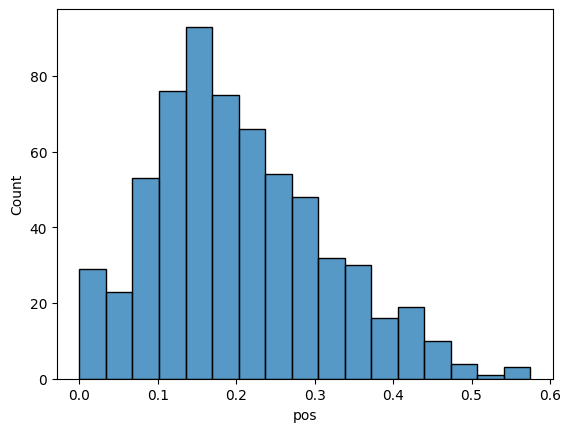

In [35]:
sns.histplot(data=product_df,x='pos')

<Axes: xlabel='pos'>

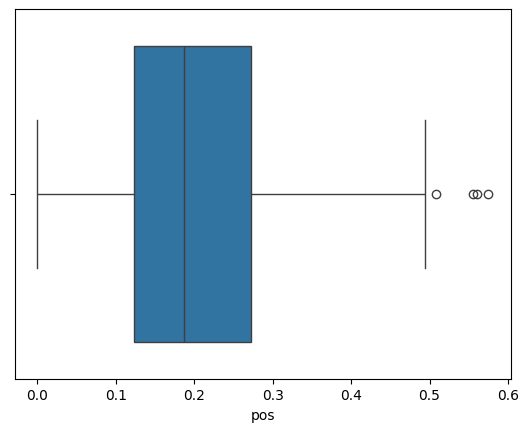

In [36]:
sns.boxplot(product_df,x='pos')

<Axes: xlabel='neg', ylabel='Count'>

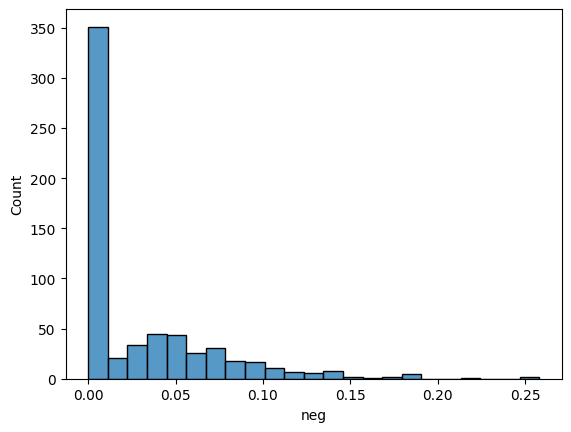

In [37]:
sns.histplot(product_df,x='neg')

<Axes: xlabel='neg'>

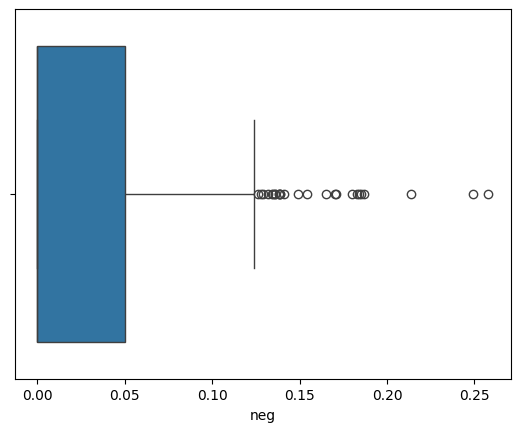

In [38]:
sns.boxplot(product_df,x='neg')

ins. 

<Axes: xlabel='Score', ylabel='count'>

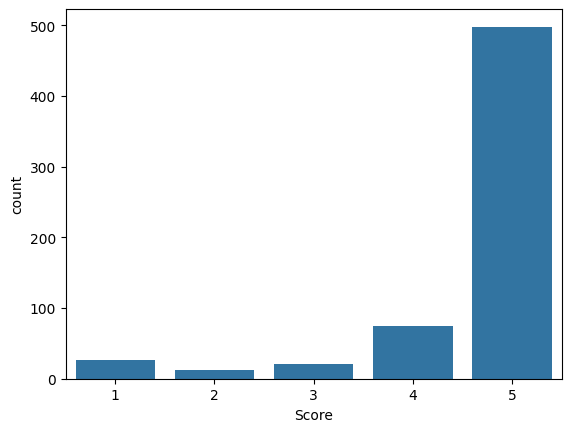

In [39]:
sns.countplot(product_df,x='Score')

ins 2

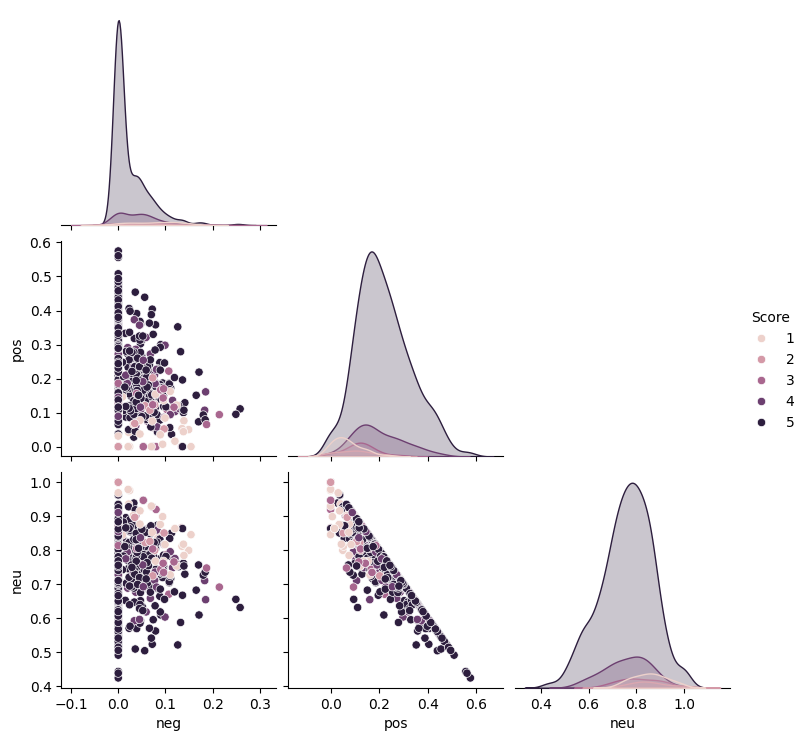

In [40]:
sns.pairplot(product_df[['Score','neg','pos','neu']],corner=True,hue = 'Score')

# Word cloud

In [41]:
from wordcloud import WordCloud

In [42]:
all_reviews =  ' '.join(text for text in product_df['Text'])

In [43]:
all_reviews

'my 12 year old shelti ha chronic brochot been on med for three year these help with the cough fit at night so i like thembr one bite and both my dog are addict be warn 7 pm both shelti are on my lap howl for the drug fix i am a dog trainer and have never seen anyth like itbr br three week later the belov shelti got a bowel blockag from these use with cautionbr if the cat get too mani she ha the runsbr shelti did better when i up her thryoid med and gave her doggi asthma medsbr so it work better for the 18 year old cat who also ha asthma these are genuin greeni product not a knockoff my dog love them it is their favorit treat i have 2 small dog both under 10 lb and the teeni size is perfect for them i paid 2237 for thi 96pack and it is by far the best price i have found anywher i wish these were part of the subscrib save program our dog love greeni but of cours which doggi dont i bought thi for my dashchund and minpin and it perfect a great price for a great product who could ask for m

In [44]:
def wcloud(txt):
    wordcloud = WordCloud(max_font_size=50,max_words=100,background_color='white').generate(txt)
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

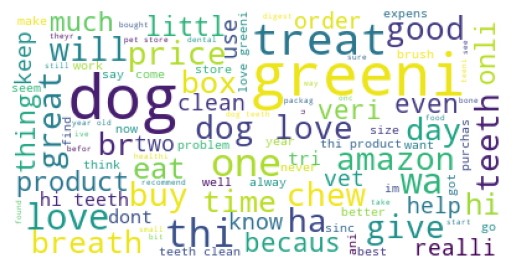

In [45]:
wcloud(all_reviews)

In [46]:
neg_reviews = ' '.join(text for text in product_df.loc[product_df['neg']>product_df['pos'],'Text'])

In [47]:
neg_reviews

'i highli recommend these chew for your dog they do exactli what they say that they will do freshen your dog breathbr br i found them to be significantli cheaper to buy them at amazon compar to the chain pet store at least 10 cheaper as of sept 2011br br i have read that some dog do not chew them well enough and have choke i have not had that happen to my dog but it is probabl someth you need to take into considerationbr br my advic is to buy a smaller bag at a pet store first and see if they work for your anim then come back and buy them here i tri greeni on my dog about 8 year ago and he wont eat them so i tri dental rawhid chew which he chew just fine my dog is now 13 year old and he start to swallow the dental rawhid whole and would choke on them im not sure becaus of hi age that he tri to swallow them whole but im sure it not good for him i thought i would tri the greeni again becaus the review are good and they break into bit when chew i order the larg greeni for him and he love 

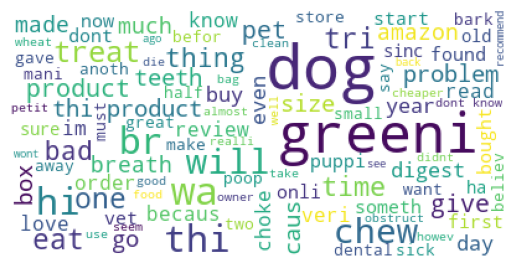

In [48]:
wcloud(neg_reviews)

Pareto

In [49]:
neg_tokens =  nltk.word_tokenize(neg_reviews)
neg_tokens

['i',
 'highli',
 'recommend',
 'these',
 'chew',
 'for',
 'your',
 'dog',
 'they',
 'do',
 'exactli',
 'what',
 'they',
 'say',
 'that',
 'they',
 'will',
 'do',
 'freshen',
 'your',
 'dog',
 'breathbr',
 'br',
 'i',
 'found',
 'them',
 'to',
 'be',
 'significantli',
 'cheaper',
 'to',
 'buy',
 'them',
 'at',
 'amazon',
 'compar',
 'to',
 'the',
 'chain',
 'pet',
 'store',
 'at',
 'least',
 '10',
 'cheaper',
 'as',
 'of',
 'sept',
 '2011br',
 'br',
 'i',
 'have',
 'read',
 'that',
 'some',
 'dog',
 'do',
 'not',
 'chew',
 'them',
 'well',
 'enough',
 'and',
 'have',
 'choke',
 'i',
 'have',
 'not',
 'had',
 'that',
 'happen',
 'to',
 'my',
 'dog',
 'but',
 'it',
 'is',
 'probabl',
 'someth',
 'you',
 'need',
 'to',
 'take',
 'into',
 'considerationbr',
 'br',
 'my',
 'advic',
 'is',
 'to',
 'buy',
 'a',
 'smaller',
 'bag',
 'at',
 'a',
 'pet',
 'store',
 'first',
 'and',
 'see',
 'if',
 'they',
 'work',
 'for',
 'your',
 'anim',
 'then',
 'come',
 'back',
 'and',
 'buy',
 'them',
 'he

In [50]:
def clean_text(tokens,remove):
    clean_tokens= []
    for word in tokens:
        if not word in remove:
            clean_tokens.append(word)
    return clean_tokens


In [90]:
clean_tkns = clean_text(neg_tokens,['greeni','br','i','wa','thi','hi','dog','treat','thing'])

In [91]:
neg_tags = nltk.pos_tag(clean_tkns)
neg_tags

[('highli', 'JJ'),
 ('recommend', 'VBP'),
 ('these', 'DT'),
 ('chew', 'NNS'),
 ('for', 'IN'),
 ('your', 'PRP$'),
 ('they', 'PRP'),
 ('do', 'VBP'),
 ('exactli', 'VB'),
 ('what', 'WP'),
 ('they', 'PRP'),
 ('say', 'VBP'),
 ('that', 'IN'),
 ('they', 'PRP'),
 ('will', 'MD'),
 ('do', 'VB'),
 ('freshen', 'VB'),
 ('your', 'PRP$'),
 ('breathbr', 'NN'),
 ('found', 'VBD'),
 ('them', 'PRP'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('significantli', 'JJ'),
 ('cheaper', 'JJR'),
 ('to', 'TO'),
 ('buy', 'VB'),
 ('them', 'PRP'),
 ('at', 'IN'),
 ('amazon', 'NN'),
 ('compar', 'NN'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('chain', 'NN'),
 ('pet', 'JJ'),
 ('store', 'NN'),
 ('at', 'IN'),
 ('least', 'JJS'),
 ('10', 'CD'),
 ('cheaper', 'JJR'),
 ('as', 'IN'),
 ('of', 'IN'),
 ('sept', 'NN'),
 ('2011br', 'CD'),
 ('have', 'VBP'),
 ('read', 'VBN'),
 ('that', 'IN'),
 ('some', 'DT'),
 ('do', 'VBP'),
 ('not', 'RB'),
 ('chew', 'VB'),
 ('them', 'PRP'),
 ('well', 'RB'),
 ('enough', 'RB'),
 ('and', 'CC'),
 ('have', 'VBP'),
 ('choke', '

In [92]:
nouns_df =  pd.DataFrame(columns=['name'])

In [93]:
for word in neg_tags:
    if word[1] =='NN':
        nouns_df.loc[len(nouns_df.index)]={'name': word[0]}

In [94]:
nouns_df

,name
0,breathbr
1,amazon
2,compar
3,chain
4,store
...,...
776,crazi
777,doe
778,help
779,breath


In [95]:
nouns_df.value_counts()

name      
product       25
time          15
chew          13
problem       12
size          12
              ..
guy            1
grenni         1
greeniesbr     1
greeniebr      1
ziploc         1
Name: count, Length: 427, dtype: int64

In [96]:
nouns_df.value_counts().nlargest(20)

name   
product    25
time       15
chew       13
problem    12
size       12
box        11
breath     11
day        10
year       10
order       9
puppi       8
vet         8
review      8
dont        7
pet         7
eat         7
amazon      6
sinc        6
bark        5
veri        5
Name: count, dtype: int64

In [97]:
pareto_df =  nouns_df.value_counts().nlargest(20).rename_axis('characteristics').reset_index(name = 'count')

In [98]:

pareto_df.head()

,characteristics,count
0,product,25
1,time,15
2,chew,13
3,problem,12
4,size,12


In [99]:
pareto_df['cumpec']=pareto_df['count'].cumsum()/pareto_df['count'].sum()*100

In [100]:
pareto_df

,characteristics,count,cumpec
0,product,25,12.820513
1,time,15,20.512821
2,chew,13,27.179487
3,problem,12,33.333333
4,size,12,39.487179
5,box,11,45.128205
6,breath,11,50.769231
7,day,10,55.897436
8,year,10,61.025641
9,order,9,65.641026


In [101]:
from matplotlib.ticker import PercentFormatter

In [102]:
def pareto(data):
    fig,ax =  plt.subplots()
    ax.bar(pareto_df['characteristics'],pareto_df['count'], color='skyblue')
    plt.xticks(rotation=90)
    ax2=ax.twinx()  # Secondary ax
    ax2.plot(pareto_df['characteristics'],pareto_df['cumpec'],color = 'red', marker='D',ms=3)
    ax2.axhline(80,color='orange')
    ax2.yaxis.set_major_formatter(PercentFormatter())

     


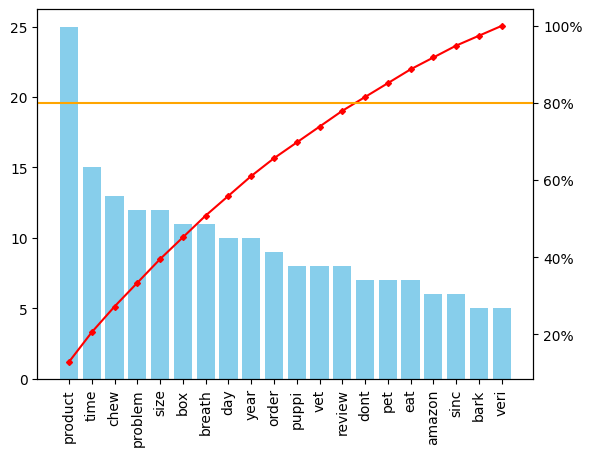

In [106]:
pareto(pareto_df)

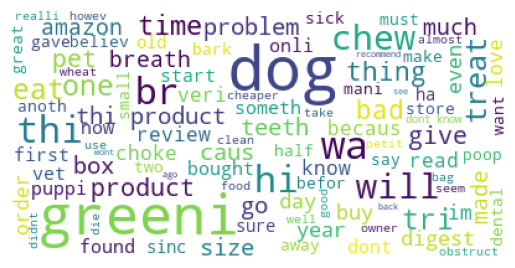

In [108]:
wcloud(neg_reviews)

In [105]:
product_df[product_df['original_text'].str.contains('size') & (product_df['neg']>product_df['pos'])].to_excel('size review.xlsx')

PermissionError: [Errno 13] Permission denied: 'size review.xlsx'